# Manchester United's awful 2021/22 Premier League season in numbers

#### Where did it all go wrong for the Red Devils? An in-depth analysis of the stats reveals the true story of a torrid season

The arrival of club hero and Portuguese legend seemed to be the final piece needed to assemble a title winning squad after a strong 2nd placed finish last season. A brief misleading start where United seemed to be back to the level of the glory days under Sir Alex Ferguson filled fans with even more optimism about a strong title push.

However, come September, it all came crashing down for the Red Devils as miserable defeats against tougher opponents and direct title rivals showed everyone just how unprepared United were for a title charge. 

![Image](https://icdn.strettynews.com/wp-content/uploads/2022/05/manchester-united-v-liverpool-premier-league-8.jpg)
(Image Credits : Stretty News)


Sloppy, disjoint performances in disheartening defeats to relegation-threatened sides saw United sack their fan-favourite manager Ole Gunnar Solskjær in November itself. Experienced German coach Ralf Rangnick was brought in on an interim basis to steady the ship, but was unable to turn the tide.

A 6th place finish, a disjointed squad of big egos, a frustrated club legend, a scrapped awards ceremony, it was United's worst points tally in their entire stay in the Premier League.

So, how did such a star studded squad stutter to such an extent? Here, we analyze every player's performance throughout the season to see just how the season unraveled so miserably for the Red Devils. 

### Manchester United in the Premier League 2021/22

Let's start by importing player stats for all games in the Premier League in the 21/22 season gone by. 

In [4]:
import pandas as pd
df = pd.read_csv('manu_data.csv')

## Data cleaning and processing
#### In order to ensure a better understanding of the dataset, it is important to clean and separate the required columns and fields in the dataframe.

In [5]:
#Remove players with 0 appearances
df.drop(df[df.MP == 0].index, inplace=True)

In [6]:
#Sort by player positions
goalie_df = df[df["Pos"]=="GK"]
defender_df = df[df["Pos"]=="DF"]
mid_df = df[df["Pos"]=="MF"]
forward_df = df[df["Pos"]=="FW"]

In [7]:
#Sort by country
countrwise_df = df.groupby(by=['Nation']).sum()

In [8]:
#Remove totals for player-only stats
player_stats_only = df.copy()
player_stats_only.drop(df[df.Player=="Squad Total"].index, inplace=True)
player_stats_only.drop(df[df.Player=="Opponent Total"].index, inplace=True)

#Top 10 goalscorers and assist providers
top_10_goalscorers = player_stats_only.sort_values(by=['Gls'], ascending=False).head(10)
top_10_assisters = player_stats_only.sort_values(by=['Ast'], ascending=False).head(10)

In [9]:
#Sort by age
above_30 = player_stats_only[player_stats_only["Age"]>=30]
between_25_to_30 = player_stats_only[(player_stats_only["Age"]<30) & (player_stats_only["Age"]>=25)]
between_20_to_25 = player_stats_only[(player_stats_only["Age"]<25) & (player_stats_only["Age"]>=20)]
below_20 = player_stats_only[player_stats_only["Age"]<20]

## The goalscoring department

As Sir Alex had rightly put it, football is a simple game where the only objective is to outscore your opponent. Taking a look at the attacking stats this season, it shows a heavy reliance on Cristiano Ronaldo alone to score all the time.

United scored a total of just 57 (1.5 per game) goals in their 37 games, their lowest tally in quite some time, and the miserable state of the forwards played a big role in the same.

![Image](https://library.sportingnews.com/2022-05/CristianoRonaldo%20-%20cropped.jpg)
(Image Credits : Sporting News)

#### The Cristiano Effect

In [10]:
#Importing all required libraries
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

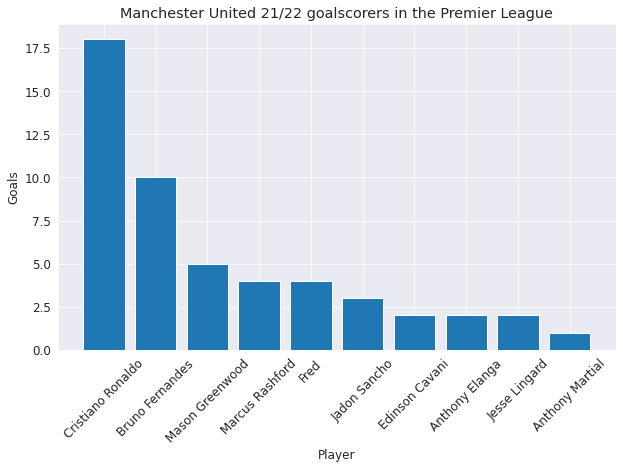

In [11]:
top_10_goalscorers['Gls'] = top_10_goalscorers['Gls'].astype(int)
plt.xticks(rotation=45)
plt.bar(top_10_goalscorers.Player, top_10_goalscorers.Gls)
plt.title("Manchester United 21/22 goalscorers in the Premier League")
plt.xlabel("Player")
plt.ylabel("Goals");

As the graph indicates, United's top goalscorer with 18 goals to his name is Portuguese superstar Cristiano Ronaldo. Despite his impressive stats, the problem lies in the chastening gap between him and their second highest goalscorer, fellow Portuguese Bruno Fernandes with only 10 goals, who plays as a midfielder.

The fact that none of United's other forwards have even made it into double figures shows just how much they had to rely on one man for their goalmouth action. A worrying sign, indeed.


#### Heavy Reliance

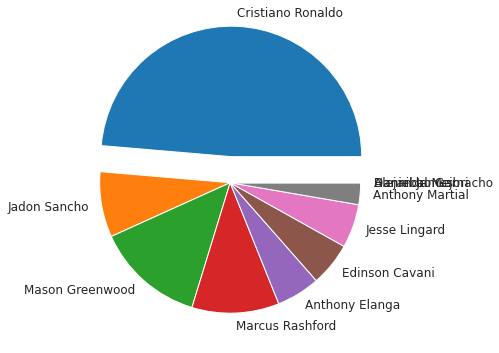

In [12]:
#Comparing United forwards' stats
plt.pie(forward_df['Gls'], labels= forward_df.Player, explode=[0.2,0,0,0,0,0,0,0,0,0,0]);

A comparison of the goals scored by forwards indicates just how big a chunk Ronaldo contributed to United's attacking output this season. Such a heavy reliance is never healthy, and United paid the cost for it.

#### Underperforming forwards

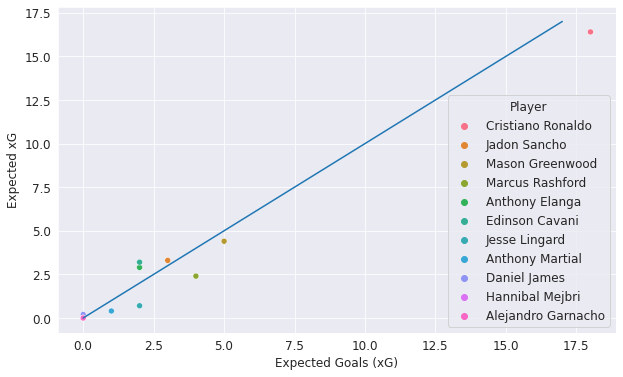

In [13]:
#Computing goals and xG
sns.scatterplot(x=forward_df.Gls,y=forward_df['Expected xG'], hue=forward_df.Player);
plt.plot([0,17],[0,17])
plt.xlabel("Goals")
plt.ylabel("Expected Goals (xG)");

The plot shows that all of United's regular starters among Rashford, Elanga or Greenwood before contibuted much lower than what was expected on them. Only Jadon Sancho, who had a strong purple patch in January and February before getting injured, has seemed to chip in with atleast up to what is expected of him.

#### Dismal overall contribution 

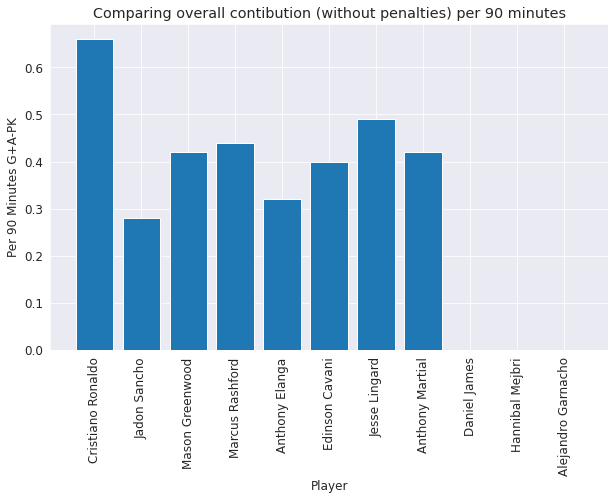

In [14]:
#Comparing overall contribution without penalty kicks
plt.xticks(rotation=90)
plt.bar(forward_df.Player,forward_df['Per 90 Minutes G+A-PK'])
plt.ylabel('Per 90 Minutes G+A-PK')
plt.xlabel("Player")
plt.title("Comparing overall contibution (without penalties) per 90 minutes");

Top teams rely on their forwards for not just goals, but contribution in every area on the pitch, in terms of assists and key passes as well.

However, the stats tell how the entire forward department misfired all season, with all of them contributing less than a goal or assist per game, showing just how much improvement is needed in their attacking play if they rae to progress next season.

## Woeful defending

#### The season saw United finish with a goal difference of just +1, avoiding a negative goal difference for the first time in their stay in the Premier League by the skin of their teeth. 

It was expected that the addition of Rapahael Varane to a stable backline consisting of star Euro performers Luke Shaw and Harry Maguire along with fellow Englishman "Spider-Wan", Aaron Wan-Bissaka would give United the defensive solidity to push for a title charge.


![Image](https://thepeoplesperson.com/wp-content/uploads/2021/09/raphael-varane-harry-maguire-sep18-min.jpg)
(Image Credits: The Peoples Person)

However, a complete collapse in form of the England trio, coupled with Varane's tendency to get frequent injuries saw United's backline chop and change througout the season.

The result? Complete misorganization and panicky defending throughout the season. Only David de Gea can hold his head high after this complete collapse at the back, for the goalkeeper saved United time and again, just like seasons gone by.

#### Tackle Success Rate

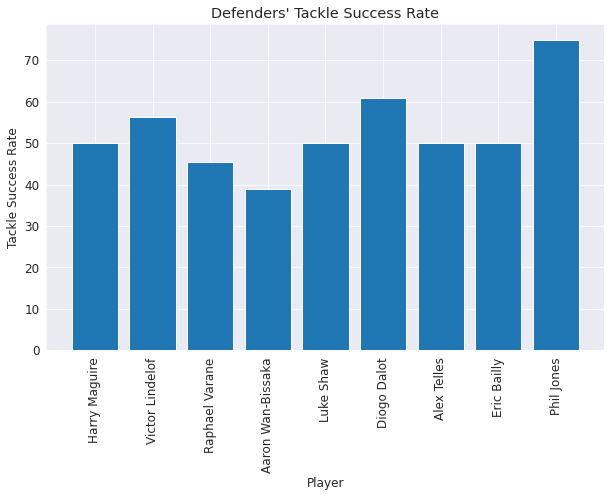

In [15]:
#Importing defensive actions data
defending_df = pd.read_csv('defensive_actions.csv')

#Filtering out defeders
defenders_actions = defending_df[defending_df.Pos=="DF"]
plt.bar(defenders_actions['Player'], defenders_actions['Tkl%'])
plt.xlabel("Player")
plt.xticks(rotation=90)
plt.ylabel("Tackle Success Rate")
plt.title("Defenders' Tackle Success Rate");

Considering that Phil Jones started only one game the entire season, it is of some amusement that he still ended as the season's best tackler for United in the Premier League.

All of United's regular starters failed to tackle their opponents more than half of the time, with Aaron Wan-Bissaka, who was particularly impressive last time around, seeing his stats fall off a cliff. Even their full-back replacements, Alex Telles and Diogo Dalot failed to get their numbers anywhere close to the level expected.

Well, if you can't tackle, you can't stop leaking goals, and that's what United did all season long.

#### Woeful Pressing Stats

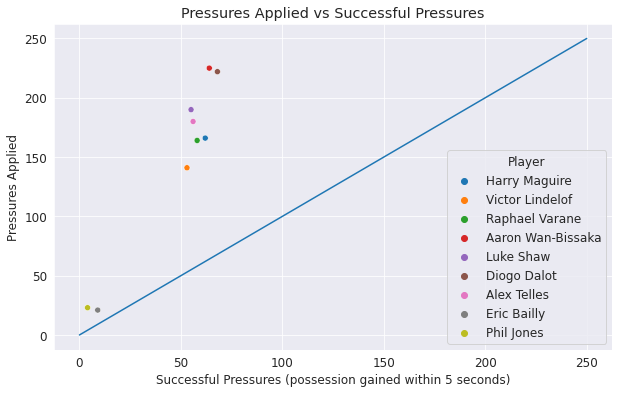

In [16]:
sns.scatterplot(x=defenders_actions['Succ'],y=defenders_actions['Press'],hue=defenders_actions['Player'])
plt.xlabel("Successful Pressures (possession gained within 5 seconds)")
plt.ylabel("Pressures Applied")
plt.title("Pressures Applied vs Successful Pressures")
plt.plot([0,250],[0,250]);

Another interesting stat to note is the lack of intensity and intent in United's pressing in their defensive third all season. Top teams like Manchester City and Liverpool build their entire defense on the idea of pressing their opponents so intensely to force them to commit mistakes.

However, looking at how little success United had in their pressing play looking above, it is not hard to comprehend how they shipped as many goals throughout the season. 

#### No meaningful blocks

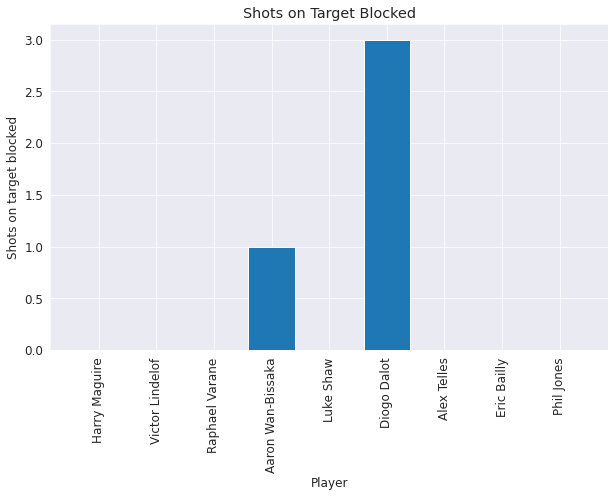

In [17]:
#Total blocked vs shots on target blocked
plt.bar(defenders_actions['Player'],defenders_actions['ShSv'])
plt.xlabel("Player")
plt.xticks(rotation=90)
plt.ylabel("Shots on target blocked")
plt.title("Shots on Target Blocked");

Considering that Harry Maguire and Victor Lindelof were United's preferred centre-back pairing for almost the entire season, the fact that they blocked 0 shots on target is a very worrying sign. If you didn't even manage to put in one meaningful block, it's hard to stake a claim on a defensive position for either of the two next season.

#### Heroic Goalkeeping

![Image](https://www.planetsport.com/image-library/og/1600/m/manchester-united-david-de-gea-2-may-2022.jpg)
(Image Credits : Planet Sport)

One saving grace for the Red Devils was just how good a season gaolkeeper David de Gea had, for his numerous saves both in open play as well as penalties kept Manchester United relevant anywhere near the top 6 in the table.


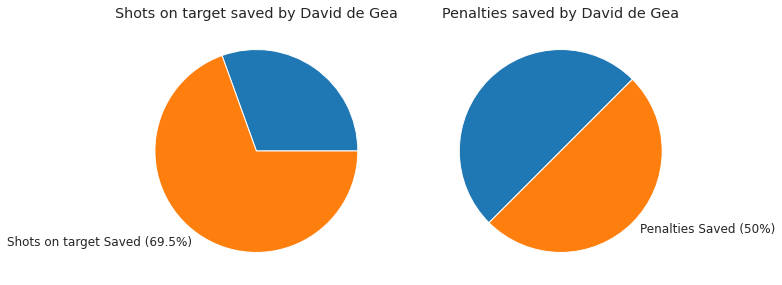

In [18]:
#GK Analysis
ddg_stats = pd.read_csv('gk_actions.csv')
fig, axes = plt.subplots(1,2);
axes[0].pie([0.305,0.695],labels=["","Shots on target Saved (69.5%)"])
axes[0].set_title("Shots on target saved by David de Gea")
axes[1].pie([0.5,0.5],labels=["","Penalties Saved (50%)"],startangle = 45)
axes[1].set_title("Penalties saved by David de Gea");

#### Over-reliance on defensive midfielders

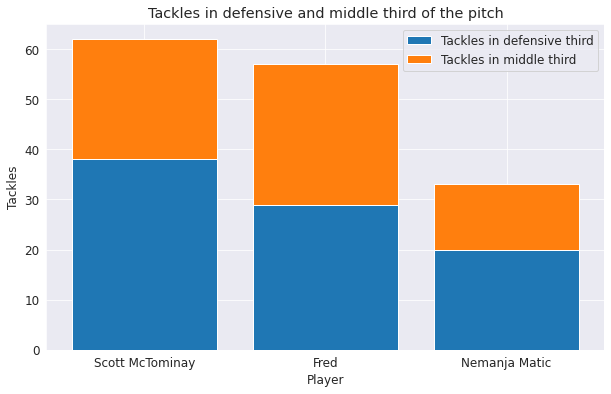

In [47]:
#Defensive Midfielders Actions
def_mids = defending_df[defending_df.Pos=="DFMF"]
plt.bar(def_mids.Player, def_mids['Def 3rd']);
plt.bar(def_mids.Player, def_mids['Mid 3rd'],bottom=def_mids['Def 3rd'])
plt.xlabel("Player")
plt.ylabel("Tackles")
plt.title("Tackles in defensive and middle third of the pitch")
plt.legend(["Tackles in defensive third", "Tackles in middle third"]);

Considering that United played with atleast 2 defensive midfielders every game, it is worth noting how little difference there is in every player's tackles made in the defensive and middle third, showing how much they had to contribute in the defense as well.

Although it bodes well that these midfielders arguably covered their defenders well, it goes on to show just how much covering they had to do for a failing defense, which also affected their attacking output.

### Uninspiring Midfield

#### Paul Pogba and Bruno Fernandes, along with Fred to a certain extent were expected to be United's creative suppliers in chief in the middle of the park, but both dropped off significantly in terms of their stats this season.

![Image](https://static.independent.co.uk/2021/04/17/12/newFile-4.jpg?quality=75&width=982&height=726&auto=webp)
(Image Credits : The Independent UK)

#### No progression from midfield

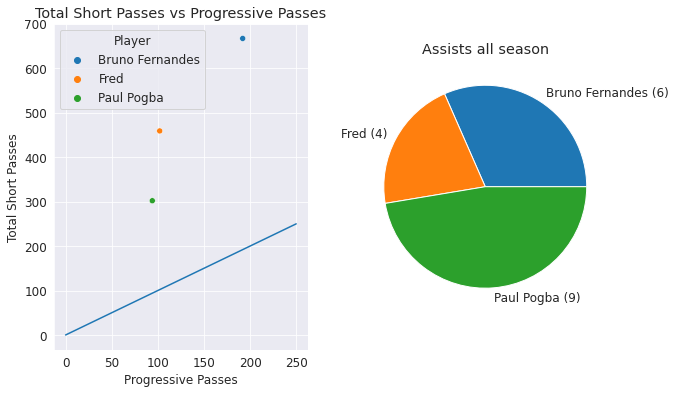

In [21]:
#Midfield analysis
mid_data = pd.read_csv('mid_data.csv')
amf_data = mid_data[mid_data.Pos=="AMF"]
fig, axes=plt.subplots(1,2)
sns.scatterplot(x=amf_data.Prog , y=amf_data.CmpShort, hue=amf_data.Player,ax=axes[0])
axes[0].set_xlabel("Progressive Passes")
axes[0].set_ylabel("Total Short Passes")
axes[0].set_title("Total Short Passes vs Progressive Passes")
axes[0].plot([0,250],[0,250])
axes[1].pie(amf_data.Ast,labels=['Bruno Fernandes (6)','Fred (4)', 'Paul Pogba (9)'])
axes[1].set_title("Assists all season");

The fact that total short passes made by these attacking players don't even come close to being progressive enough shows just how uninspiring the midfield play was this season. 

The assist count too was not up to par, with only Pogba putting up decent numbers, and that too only down to his 4 assist haul in the opening match of the season.

#### Lack of accuracy

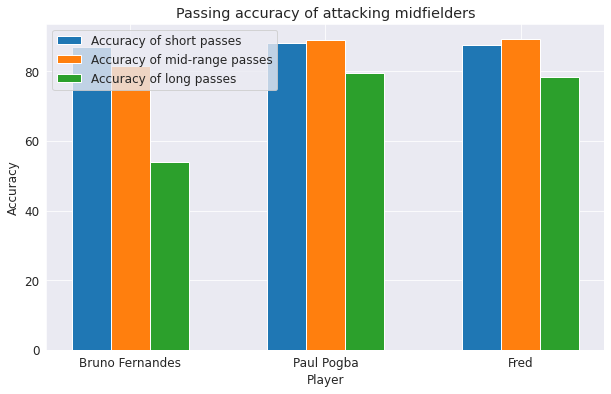

In [48]:
#AMF passing stats
N =3 
import numpy as np
ind = np.arange(N)
width = 0.2
plt.bar(ind , amf_data['CmpShort%'],width,label='Accuracy of short passes')
plt.bar(ind+width , amf_data['CmpMid%'],width,label='Accuracy of mid-range passes')
plt.bar(ind+width+width , amf_data['CmpLong%'],width,label='Accuracy of long passes')
plt.xlabel("Player")
plt.ylabel("Accuracy")
plt.title("Passing accuracy of attacking midfielders")
plt.xticks(ind + width, ('Bruno Fernandes', 'Paul Pogba', 'Fred'))
plt.legend(loc='best');

Bruno Fernandes' constant tendency to lose the ball on long passes combined with Pogba and Fred's safety first approach greatly hindered United's attacking play.

Uninspiring passing accuracy shows just how impotent United were in midfield all season. 

#### Indifferent passing stats

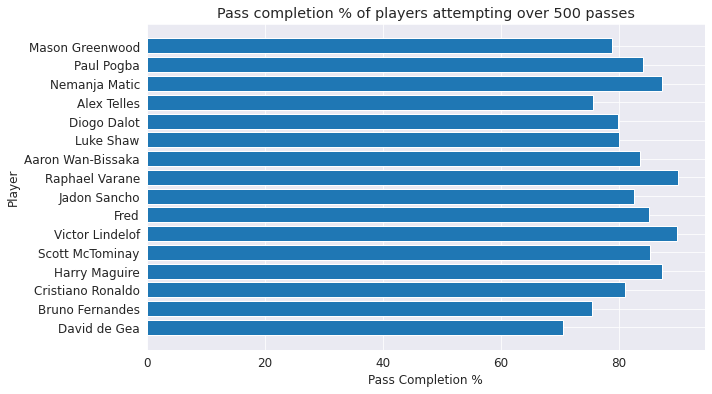

In [30]:
#Passing data for team
pass_data = mid_data[mid_data.Att >=500]
plt.barh(pass_data['Player'] , pass_data['Cmp%'])
plt.xlabel("Pass Completion %")
plt.ylabel("Player")
plt.title("Pass completion % of players attempting over 500 passes");

Midfielders should stand out with their passing accuracy, shouldn't they?

Unimpressive possession stats all round, coupled with the fact that none of the midfielders showed any progression in their play was a big factor in their disjointed performances all season.

Midfield reinforcement are needed, and fast if United are to make any progress next season under their new manager Erik ten Hag.

### Unimpressive coaches round off a terrible campaign

#### In the end, both of United's managers this season failed to deliver what was expected of them, leading to what is expected to be yet another summer of change at the club. 

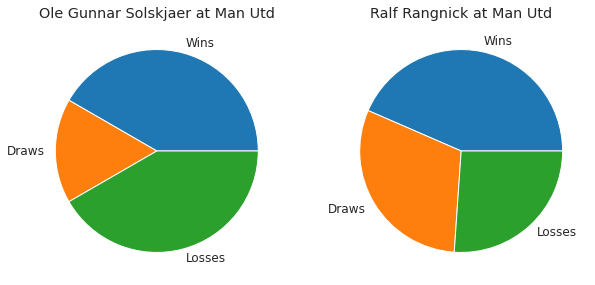

In [36]:
#Coach comparison (W,L,D)
legend= ['Wins','Draws','Losses']
ole_record= [5,2,5]
ralf_record = [10,7,6]
fig , axes = plt.subplots(1,2)
axes[0].pie(ole_record,labels=legend)
axes[0].set_title("Ole Gunnar Solskjaer at Man Utd");
axes[1].pie(ralf_record,labels=legend)
axes[1].set_title("Ralf Rangnick at Man Utd");

With both managers contributing just as much to what was a disastrous camapaign in 2021/22, Manchester United will hope the guidance of Erik ten Hag coupled with a summer of wholesale departures in an aging squad and fresh young blood being brought in will propel them to success in the years to come.

![Image](https://i2-prod.mirror.co.uk/incoming/article26623853.ece/ALTERNATES/s1200b/0_JS262468733.jpg)
(Image Credits : Manchester Evening News)

In [52]:
!pip install jovian --upgrade --quiet
import jovian
jovian.commit(project="manchester-united-season-analysis")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sahilrkale05/manchester-united-season-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/sahilrkale05/manchester-united-season-analysis


'https://jovian.ai/sahilrkale05/manchester-united-season-analysis'